In [101]:
# Read eidCodesMap from json

import json

work_loc = '/run/media/anton/Elements/UKB'

# Get number of codes

with open(f'{work_loc}/codes.json', 'r') as f:
    codes = json.load(f)
    D = len(codes)
    print(D)

with open(f'{work_loc}/eidCodesMap.json', 'r') as f:
    eidCodesMap = json.load(f)

print(len(eidCodesMap))

for k in eidCodesMap:
    print(eidCodesMap[k])
    break

1558
33204
[[870, 870, 881], [748]]


In [103]:
# Get correlations between ICD10 codes for all subjects

import numpy as np

nCodes = len(codes)
nSubs = len(eidCodesMap)

mat = np.zeros((nSubs, nCodes))

for i,k in enumerate(eidCodesMap):
    for visit in eidCodesMap[k]:
        for code in visit:
            mat[i,code] = 1

Sigma = np.corrcoef(mat.T)
print(Sigma.shape)

for i in range(len(Sigma)):
    Sigma[i,i] = 0

(1558, 1558)


In [110]:
from sklearn.cluster import KMeans

nclust = 12
model = KMeans(n_clusters=nclust)
model = model.fit(Sigma)
orig2clust = []
borders = []
for lab in range(nclust):
    for i,child_lab in enumerate(model.labels_):
        if child_lab == lab:
            orig2clust.append(i)
    borders.append(len(orig2clust))

Sigma_sorted = Sigma[orig2clust,:]
Sigma_sorted = Sigma_sorted[:,orig2clust]

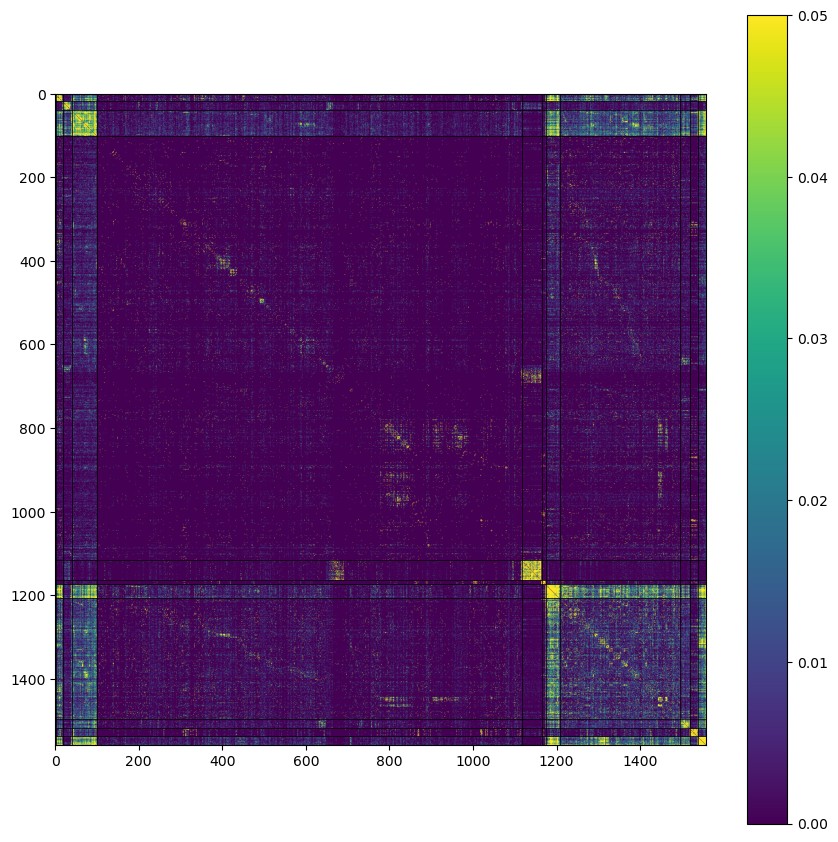

In [114]:
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(Sigma_sorted, vmin=0, vmax=0.05)
for b in borders:
    plt.plot([0,nCodes],[b,b], color='black', linewidth=0.5)
    plt.plot([b,b], [0,nCodes], color='black', linewidth=0.5)
plt.xlim([0,nCodes])
plt.ylim([nCodes,0])
plt.colorbar()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)

In [115]:
bs = 0
for b in borders:
    be = b
    print(bs, be)
    if be - bs < 100:
        for i in range(bs,be):
            print(codes[orig2clust[i]])
    bs = be

0 1
G73
1 18
B97
F05
G31
G81
I63
I67
I69
J12
J69
R26
R29
R41
R45
R47
R53
R54
U07
18 39
C50
C54
D25
D27
N70
N72
N73
N80
N81
N83
N84
N85
N88
N89
N90
N92
N93
N94
N95
Z40
Z42
39 101
A09
D12
D50
E03
E66
F32
F41
G55
H91
J44
J45
K20
K21
K22
K25
K29
K30
K31
K44
K52
K57
K58
K59
K62
K63
K64
K66
K76
K80
K92
M13
M15
M17
M19
M25
M47
M48
M51
M54
M79
M81
N39
R06
R10
R11
R13
R19
R51
R63
R69
T81
Z03
Z09
Z13
Z53
Z72
Z87
Z88
Z90
Z91
Z96
Z98
101 1116
1116 1164
N97
O02
O03
O12
O13
O14
O16
O20
O21
O23
O24
O26
O30
O32
O34
O35
O36
O40
O41
O42
O43
O44
O45
O46
O47
O48
O60
O62
O63
O64
O66
O68
O69
O70
O72
O73
O75
O80
O82
O86
O90
O99
Z33
Z34
Z35
Z36
Z37
Z39
1164 1174
J68
T20
T21
T22
T23
T24
T27
T31
T95
X13
1174 1207
A41
B37
B96
C77
C78
C79
D64
D69
D70
E83
E86
E87
I95
J18
J22
J90
J96
J98
L89
N17
R50
R60
R94
T82
U83
Y43
Y83
Y95
Z11
Z50
Z51
Z85
Z93
1207 1496
1496 1519
C61
C67
D09
D41
K40
N13
N20
N28
N30
N32
N35
N40
N41
N42
N50
R31
R33
R35
R39
R79
T83
Z08
Z46
1519 1538
F33
F43
F60
T37
T39
T40
T42
T43
T44
T46
T50
T51
X